In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import shutil
from os import listdir
from os.path import isfile, join
from scipy.signal import find_peaks
from itertools import chain


plt.style.use('figuras_lucio.mplstyle')

Single plot

<class 'numpy.ndarray'>
[-0.056  -0.0568 -0.056  -0.0568 -0.0728 -0.0648 -0.0552 -0.0544]


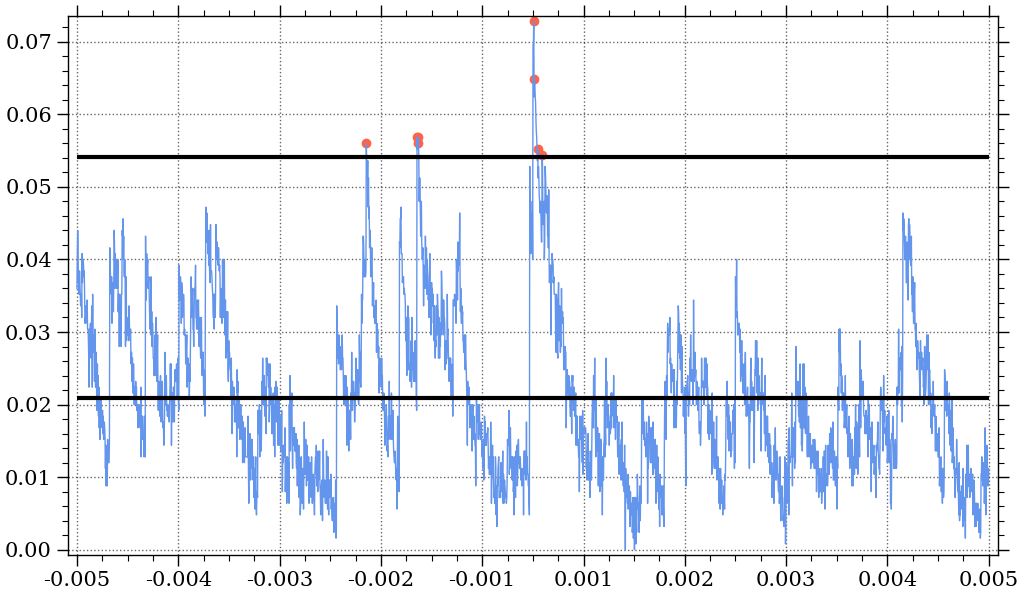

In [ ]:

path = f'./18-10\G6L5V/Clase 18-10' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not

df = pd.read_csv(join(path, onlyfiles[0]))
t = df['Datos'].values
d = df["Tiempo"].values
d_mean = np.mean(d)
d_std = np.std(d)

#Peaks
#Busco los picos en el conjunto de datos -d, para que los valles (que son nuestas detecciónes) se vuelvan picos y así detectarlos con find_peaks.
peak_index = find_peaks(-d,height = -d_mean+ 3*d_std)
peaks_t = np.array([t[i] for i in peak_index[0]])
peaks_signal = np.array([d[i] for i in peak_index[0]])

print(type(peaks_t))
print(peaks_signal)
#PLOT
fig, ax = plt.subplots()
ax.plot(t,-d,linewidth = 1);
ax.hlines(-d_mean + 3*d_std,t[0],t[-1],color = 'black');
ax.hlines(-d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);

ax.scatter(peaks_t,-peaks_signal,color = 'tomato');



Función para encontrar picos

In [49]:
def get_peaks(data,time,height = None, prominence = None,threshold = None):
    
    peak_index = find_peaks(-data,height = height, prominence = prominence,threshold = threshold)
    peaks_t = np.array([time[i] for i in peak_index[0]])
    peaks_signal = np.array([data[i] for i in peak_index[0]])

    return peaks_signal, peaks_t

In [33]:
def flatten_chain(matrix):
    return list(chain.from_iterable(matrix))

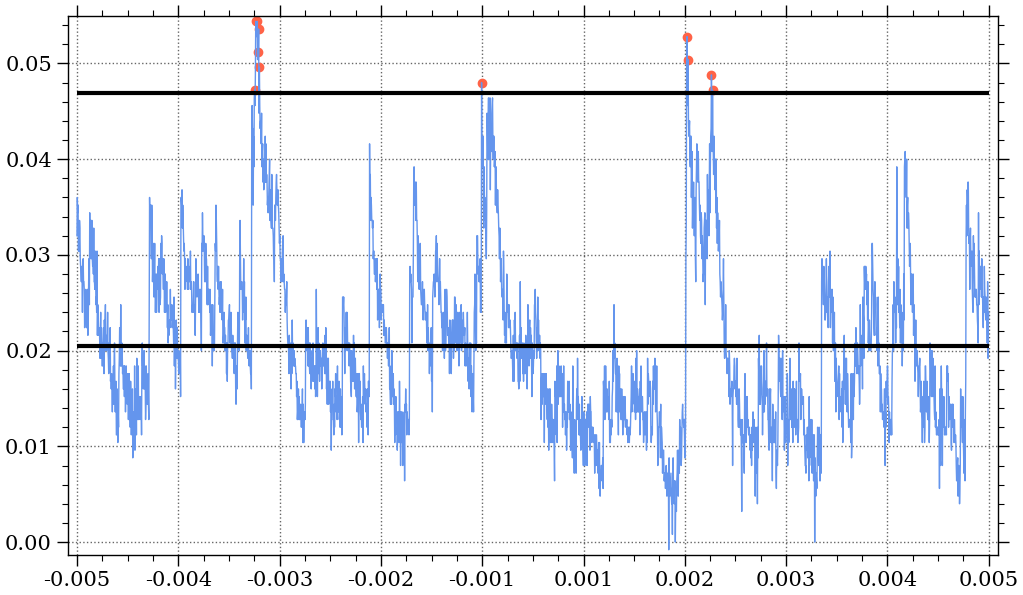

In [ ]:
path = f'./18-10\G6L5V/Clase 18-10' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not

df = pd.read_csv(join(path, onlyfiles[2]))
t = df['Datos'].values
d = df["Tiempo"].values
d_mean = np.mean(d)
d_std = np.std(d)

#Peaks
#Busco los picos en el conjunto de datos -d, para que los valles (que son nuestas detecciónes) se vuelvan picos y así detectarlos con find_peaks.
peaks_signal, peaks_t = get_peaks(d,t,height = -d_mean + 3*d_std)

#PLOT
fig, ax = plt.subplots()
ax.plot(t,-d,linewidth = 1);
ax.hlines(-d_mean + 3*d_std,t[0],t[-1],color = 'black');
ax.hlines(-d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);

ax.scatter(peaks_t,-peaks_signal,color = 'tomato');

La idea es encontrar todos los picos que sean detectables y guardar que voltage generan. Luego, realizar un histograma donde se vea la cantidad de picos que se cuentan para cada voltage genereado por ellos.
Para esto, find_peaks tiene que dejar de tener la condición de 3 desviaciónes estandard, y tendrá que tener un trabajo mas fino.

Text(0.5, 1.0, 'iteración 7 Medición nro 10.csv')

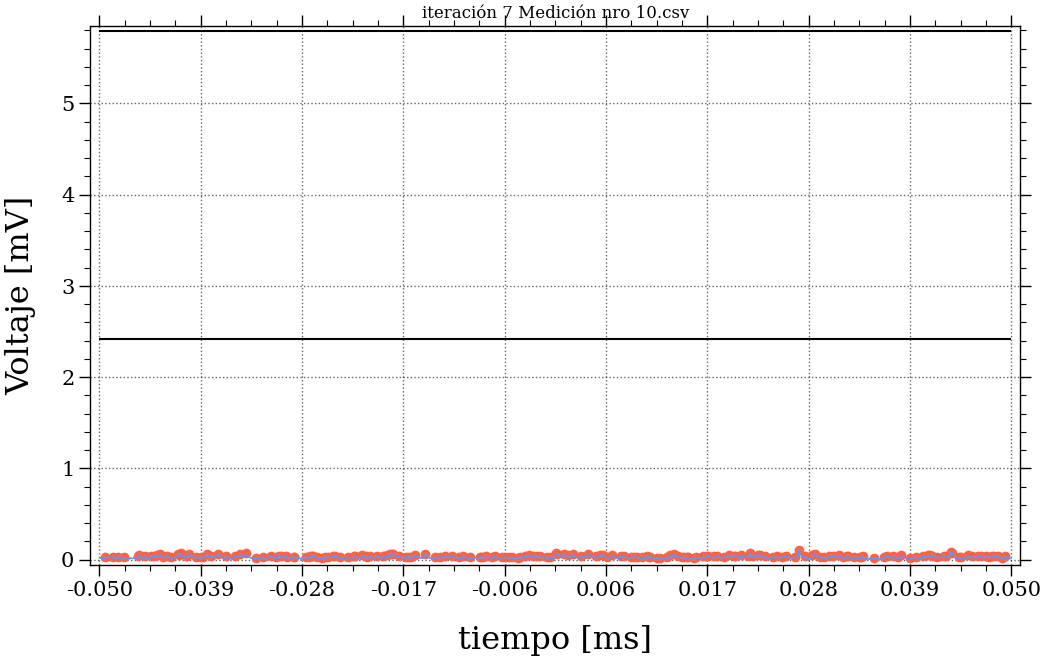

In [ ]:
path = f'./18-10\G6L5V/Clase 18-10' # Foldder where measurements are
onlyfiles = [file for file in listdir(path) if isfile(join(path, file))] #isfile returns a boolean if the specified path is a file or not

df = pd.read_csv(join(path, onlyfiles[2]))
t = df['Datos'].values
d = df["Tiempo"].values
d_mean = np.mean(d)
d_std = np.std(d*)

#Peaks
#Busco los picos en el conjunto de datos -d, para que los valles (que son nuestas detecciónes) se vuelvan picos y así detectarlos con find_peaks.
peaks_signal, peaks_t = get_peaks(d,t,prominence = 0.01)

#PLOT
fig, ax = plt.subplots()
ax.plot(t,-d,linewidth = 1);
ax.hlines(-d_mean + 3*d_std,t[0],t[-1],color = 'black');
ax.hlines(-d_mean,t[0],t[-1],color = 'black');

xlabels = np.linspace(t[0],t[-1],10,endpoint = True)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.3f}' for number in xlabels]);

ax.scatter(peaks_t,-peaks_signal,color = 'tomato');

ax.set_ylabel(r'Voltaje [mV]')
ax.set_xlabel(r'tiempo [ms]')
ax.set_title(rf'{onlyfiles[2]}')


In [57]:
peaks_voltage = []
for i in range(8):
    path = f'Clase 01-11/Mediciones con laser/Iteración {i}'
    onlyfiles = [file for file in listdir(path) if isfile(join(path, file))]
    for file in onlyfiles:
        df = pd.read_csv(join(path, file))
        t = df['Datos'].values
        d = df["Tiempo"].values

        peaks, peaks_t = get_peaks(d,t,prominence = 0.01)

        peaks_voltage.append(peaks)

In [69]:
flattened_peaks = np.array([value for value in peaks_voltage[i] for i in range(len(peaks_voltage))])
flattened_peaks_mv = flattened_peaks * 100
# print(len(peaks_voltage[0]))
print(len(flattened_peaks))

267000


0.13265306122448983


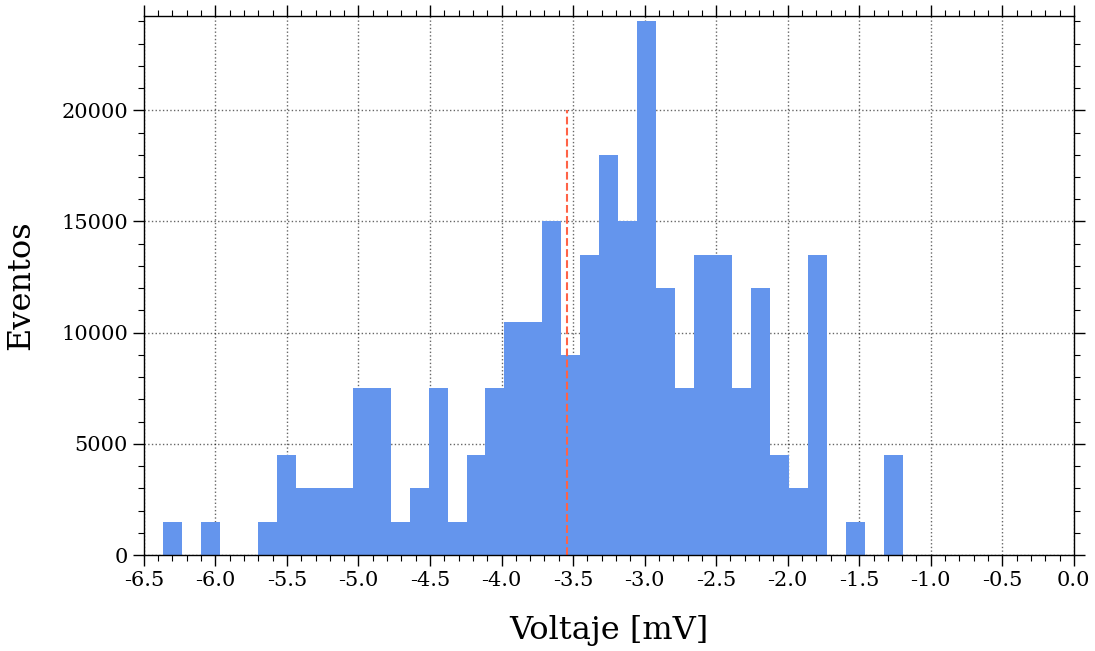

In [98]:
fig, ax = plt.subplots()
start = -6.5
bins = np.linspace(-6.5,0,endpoint = True)
print(bins[1]-bins[0])
# print(bins);
ax.hist(x = flattened_peaks_mv, bins = bins);
ax.set_xlim(bins[0],0)

xlabels = np.arange(bins[0],0.5,0.5,)
ax.set_xticks(xlabels)
ax.set_xticklabels([f'{number:.1f}' for number in xlabels]);

ax.set_ylabel(f'Eventos')
ax.set_xlabel(f'Voltaje [mV]')
ax.vlines(x = d_mean - d_std, ymin = 0, ymax = 20000,color = 'tomato',linestyles = 'dashed')

Función que levante datos y me cree un histograma

In [58]:
# path = f'Clase 01-11/Mediciones con laser/Iteración {i}'

def histograma(path,iteracion,title = False,prominence = None, height = None,threshold = None):
    peaks_voltage = []
    folder = f'Iteración {iteracion}'
    path = join(path,folder)
    onlyfiles = [file for file in listdir(path) if isfile(join(path, file))]
    for file in onlyfiles:
        df = pd.read_csv(join(path, file))
        t = df['Datos'].values
        d = df["Tiempo"].values
        peaks, peaks_t = get_peaks(d,t,prominence = 0.01, height = None,threshold = None)

        peaks_voltage.append(peaks)

    # flattened_peaks = np.array([value for value in peaks_voltage[j] for j in range(len(peaks_voltage))])
    flattened_peaks = flatten_chain(peaks_voltage)
    flattened_peaks_mv = np.array(flattened_peaks) * 100
    # print(len(peaks_voltage[0]))
    # print(len(flattened_peaks))    
    #  
    d_mean = np.mean(d*100)
    d_std = np.std(d*100)

    #Histograma --------------------------------------------------------------------------------------------

    fig, ax = plt.subplots()
    start = -6.5
    end = 0
    num = 50
    bins = np.linspace(start,end,endpoint = True,num = num)
    print(bins[1]-bins[0])
    # print(bins);
    ax.hist(x = flattened_peaks_mv, bins = bins);
    ax.set_xlim(bins[0],0)

    xlabels = np.arange(bins[0],0.5,0.5,)
    ax.set_xticks(xlabels)
    ax.set_xticklabels([f'{number:.1f}' for number in xlabels]);

    ax.set_ylabel(f'Eventos')
    ax.set_xlabel(f'Voltaje [mV]')
    ax.axvline(x = d_mean - d_std, ymin = 0, ymax = 1,color = 'tomato',linestyle = '--')
    ax.annotate(f' Prominence: {prominence}\n Bin size: {abs(start-end)/num}\n Threshold: {threshold}\n Height: {height}',(0.8,0.75),xycoords='axes fraction',fontsize = 13)
    if title:
        ax.set_title(f'{path}')

    return fig

0.13265306122448983


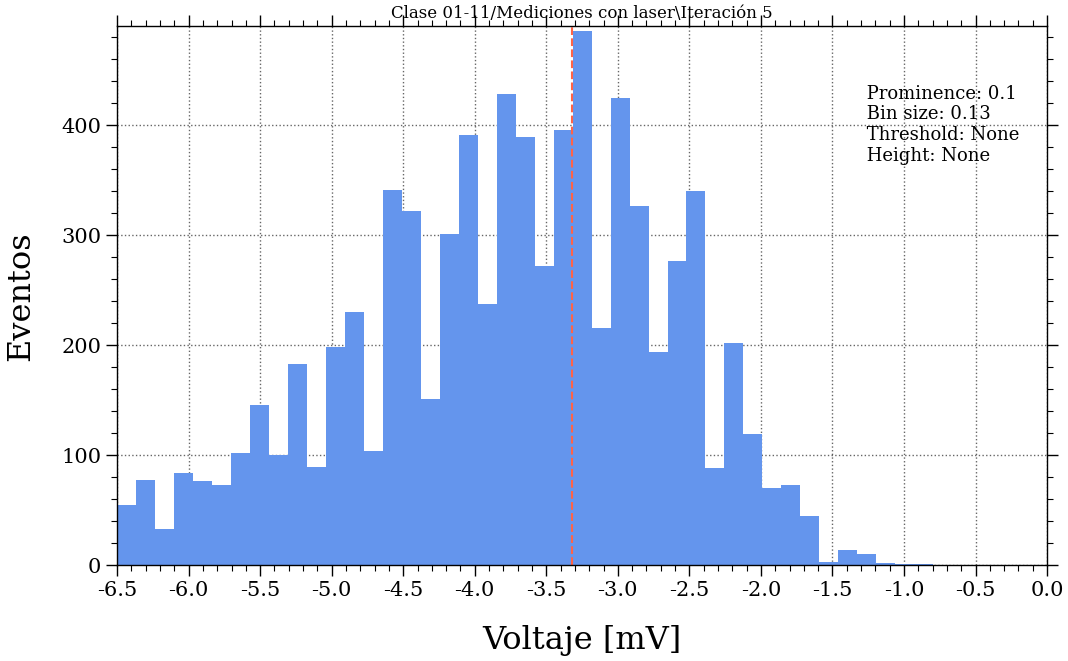

In [60]:
path = f'Clase 01-11/Mediciones con laser'
iteracion = 5
fig = histograma(path,iteracion,title = True,prominence=0.1)
fig.savefig(join(path,f'Figuras/Iteración {iteracion}'))